# New York City Taxi Trip Duration

Share code and data to improve ride time predictions

---

## Contents

- First EDA
- F-Test
- Leverage
- Outlier
- ANOVA
- 결과 확인
- 스케일링 / 변수변환 / 다중 공선성
- 다항회귀
- 최적 모델링

---

## 0. Setting 

In [1]:
# Taxi package
import pandas as pd
import numpy as np
import scipy as sp

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import datetime as dt
from patsy import dmatrix

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes(palette="muted")



/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


추가해야 할 함수

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from patsy import dmatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

---

## 1. First EDA

- 종합 EDA
- 개별 EDA

### 1) 종합 EDA

#### (1) Setting

In [4]:
# data set
taxi = pd.read_csv('train.csv')
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,N,198


#### (2) 변수 의미

| Values | Meaning |
|-|-|
|id | a unique identifier for each trip |
|vendor_id | a code indicating the provider associated with the trip record |
|pickup_datetime|date and time when the meter was engaged |
|dropoff_datetime|date and time when the meter was disengaged|
|passenger_count|the number of passengers in the vehicle (driver entered value)|
|pickup_longitude|the longitude where the meter was engaged|
|pickup_latitude| the latitude where the meter was engaged|
|dropoff_longitude| the longitude where the meter was disngaged|
|dropoff_latitude| the latitude where the meter was disengaged|
|store_and_fwd_flag|This indicates whether the trip record was held in vehicle memory |
|trip_duration|duration of the trip in seconds|

#### (3) Information

In [5]:
# 데이터 크기
taxi.shape # 1,458,644개 데이터, 11개의 컬럼으로 구성

(1458644, 11)

In [6]:
# 데이터에 대한 정보 (컬럼 개수, null값 여부, 데이터 유형)
taxi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


- object : id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
- int : vendor_id, passenger_count, trip_duration
- float : pickup_logitude, pickup_latitude, dropoff_logitude, dropoff_latitude

In [7]:
# Descriptive statistics
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


### 2) 개별 변수 EDA

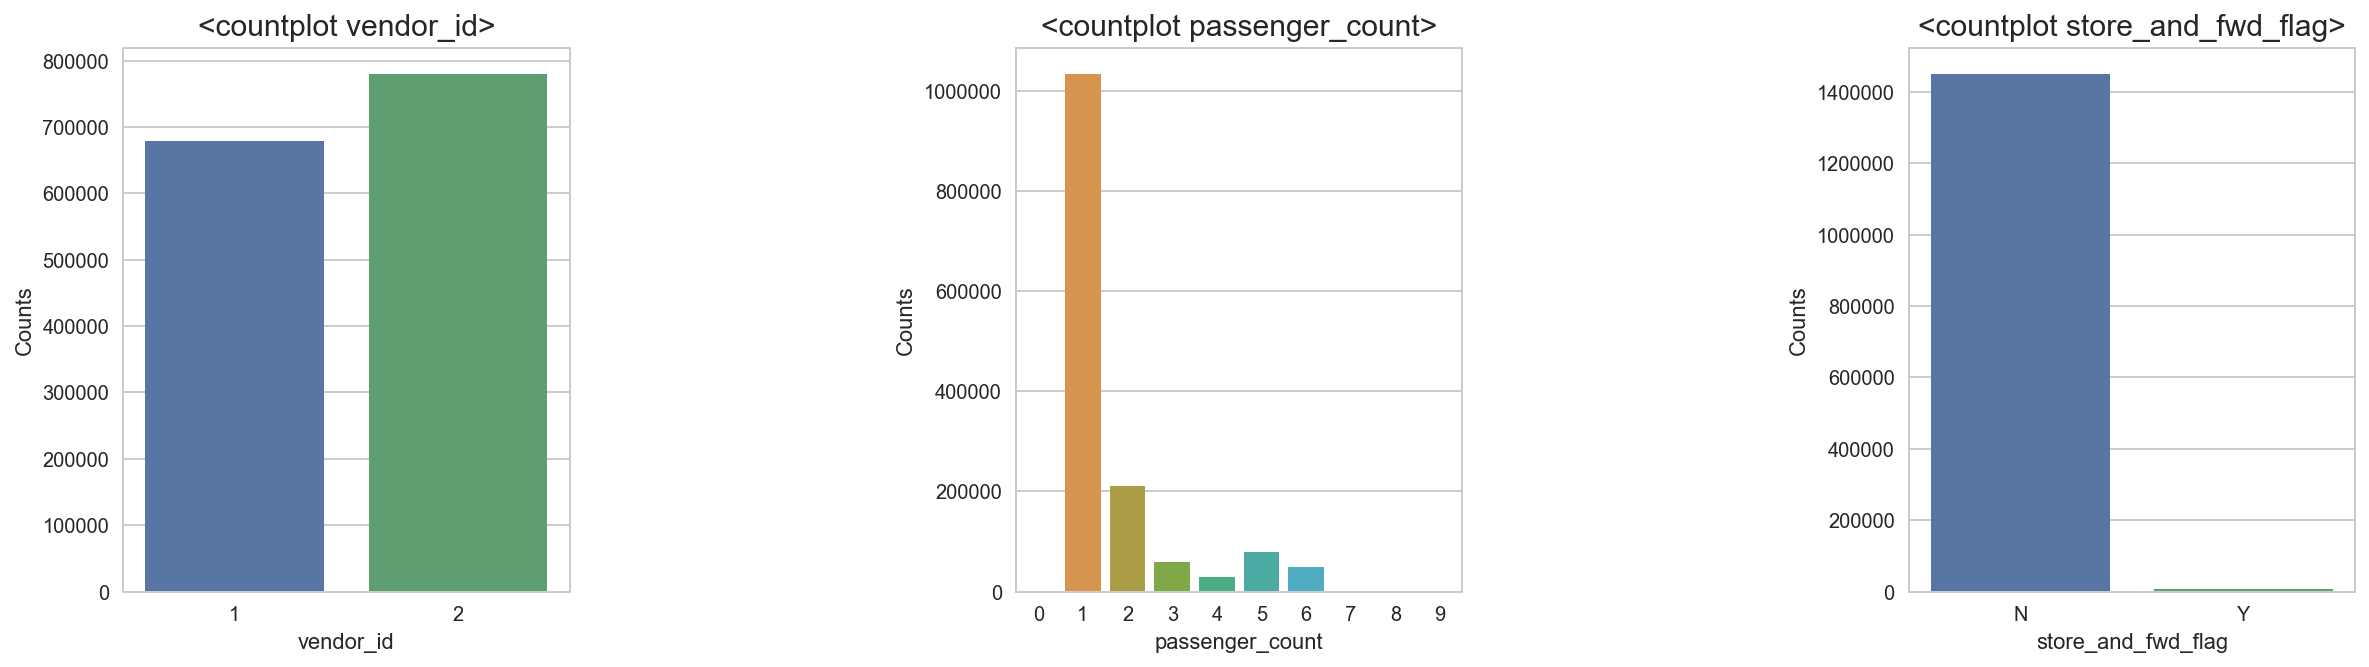

In [8]:
# countplot
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 1)

# vendor_id
plt.subplot(131)
sns.countplot(x = 'vendor_id', data = taxi)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('Counts')

# passenger_count
plt.subplot(132)
sns.countplot(x = 'passenger_count', data = taxi)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(x = 'store_and_fwd_flag', data = taxi)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Counts')

plt.show()

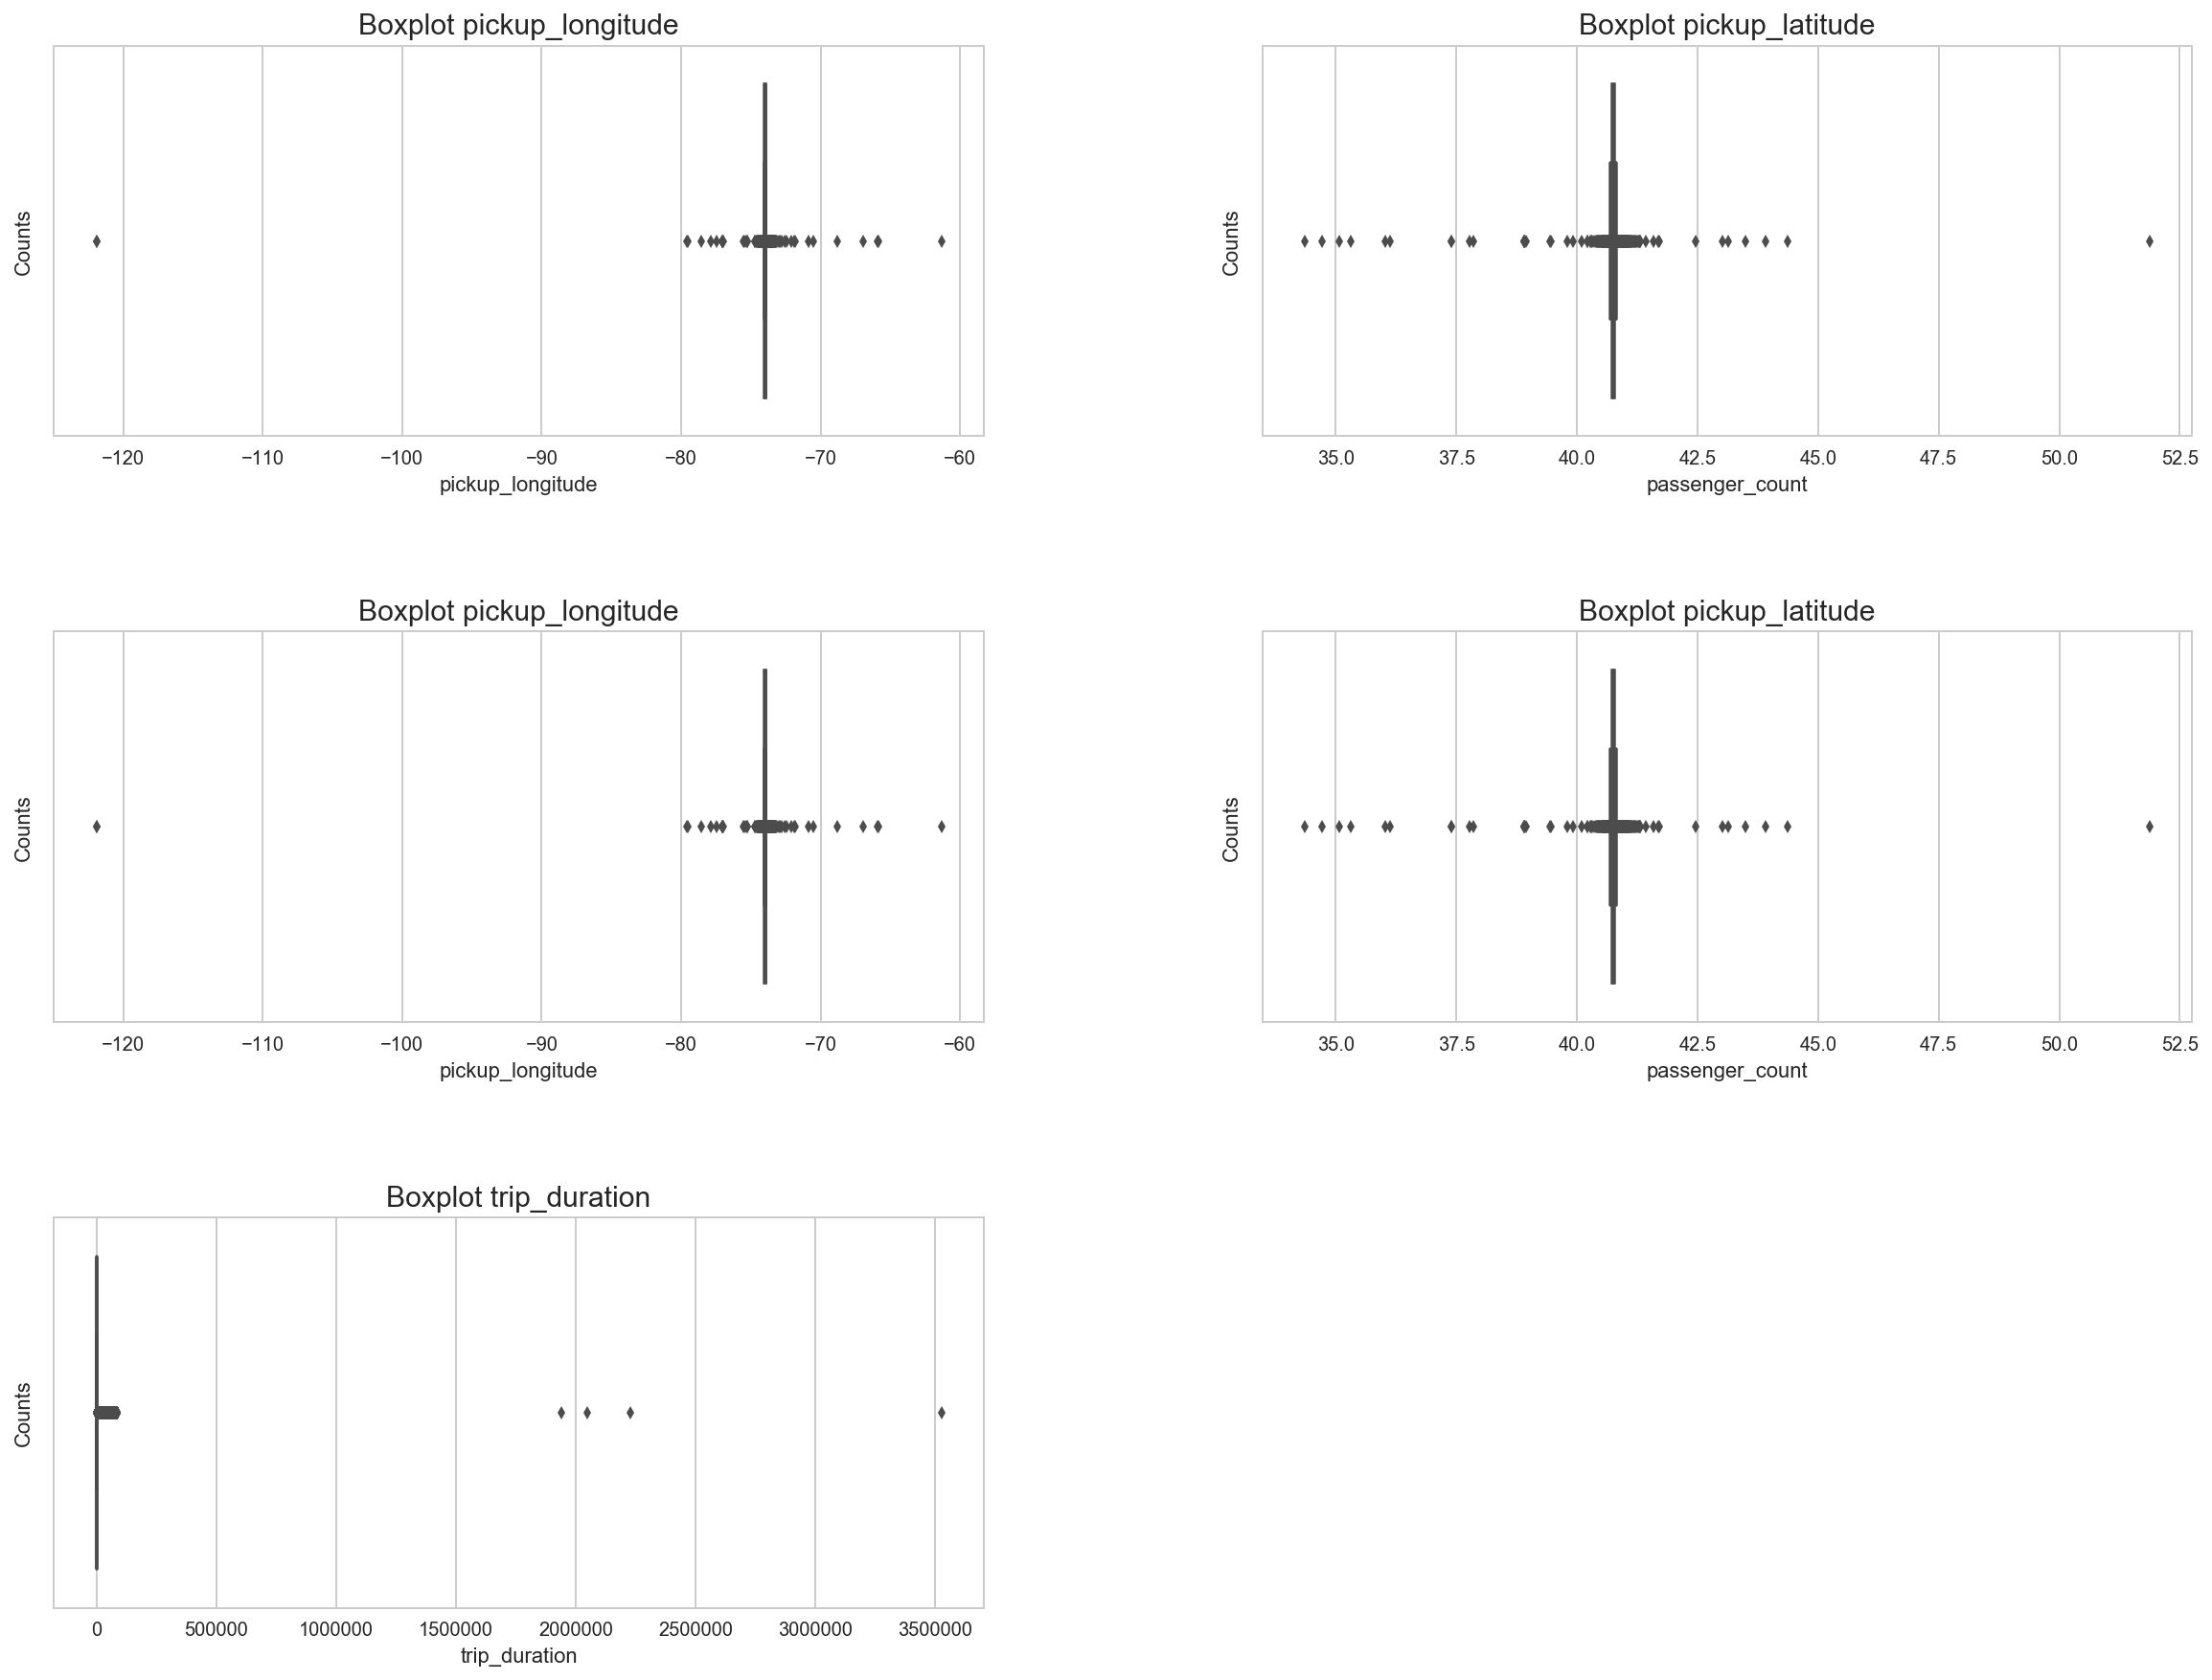

In [33]:
# boxplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
sns.boxplot(x = 'pickup_longitude', data = taxi)
plt.title('Boxplot pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')
plt.ylabel('Counts')

# pickup_latitude
plt.subplot(322)
sns.boxplot(x = 'pickup_latitude', data = taxi)
plt.title('Boxplot pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# dropoff데이터를 넣어야 되는데 일단은 렉먹어서 박스플롯으로 대체
plt.subplot(323)
sns.boxplot(x = 'pickup_longitude', data = taxi)
plt.title('Boxplot pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')
plt.ylabel('Counts')

# pickup_latitude
plt.subplot(324)
sns.boxplot(x = 'pickup_latitude', data = taxi)
plt.title('Boxplot pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# Trip_druation
plt.subplot(325)
sns.boxplot(x = 'trip_duration', data = taxi)
plt.title('Boxplot trip_duration', fontsize = 15)
plt.xlabel('trip_duration')
plt.ylabel('Counts')

plt.show()

### 3) 독립변수(X)와 종속변수(trip_duration) EDA

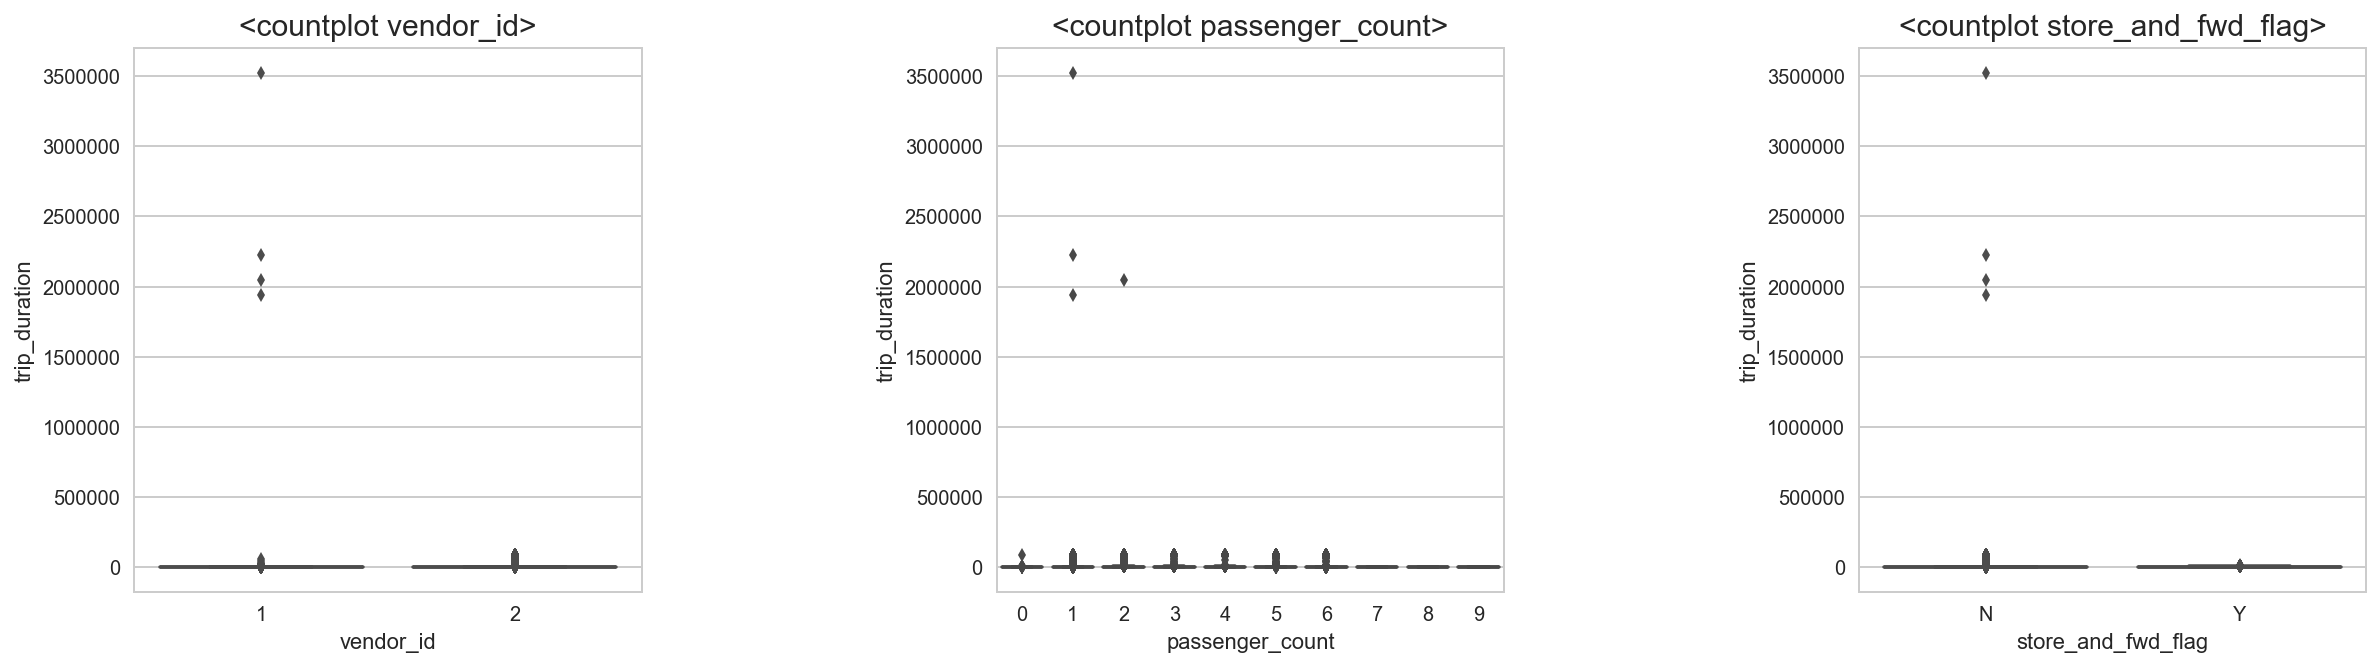

In [39]:
# countplot
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = taxi)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('trip_duration')

# passenger_count
plt.subplot(132)
sns.boxplot(x = 'passenger_count', y = 'trip_duration', data = taxi)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')

# store_and_fwd_flag
plt.subplot(133)
sns.boxplot(x = 'store_and_fwd_flag', y = 'trip_duration', data = taxi)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('trip_duration')

plt.show()

KeyboardInterrupt: 

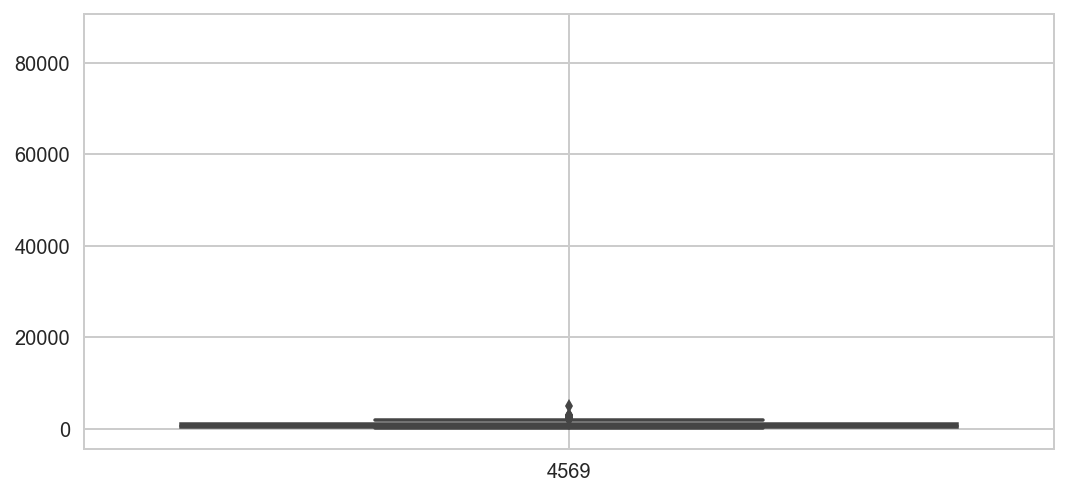

In [43]:
# boxplot
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(221)
sns.boxplot(x = 'pickup_longitude', y = 'trip_duration', data = taxi)
plt.title('Boxplot pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')
plt.ylabel('Counts')

# pickup_latitude
plt.subplot(222)
sns.boxplot(x = 'pickup_latitude', y = 'trip_duration', data = taxi)
plt.title('Boxplot pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# dropoff데이터를 넣어야 되는데 일단은 렉먹어서 박스플롯으로 대체
plt.subplot(223)
sns.boxplot(x = 'pickup_longitude', y = 'trip_duration', data = taxi)
plt.title('Boxplot pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')
plt.ylabel('Counts')

# pickup_latitude
plt.subplot(224)
sns.boxplot(x = 'pickup_latitude', y = 'trip_duration', data = taxi)
plt.title('Boxplot pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

plt.show()

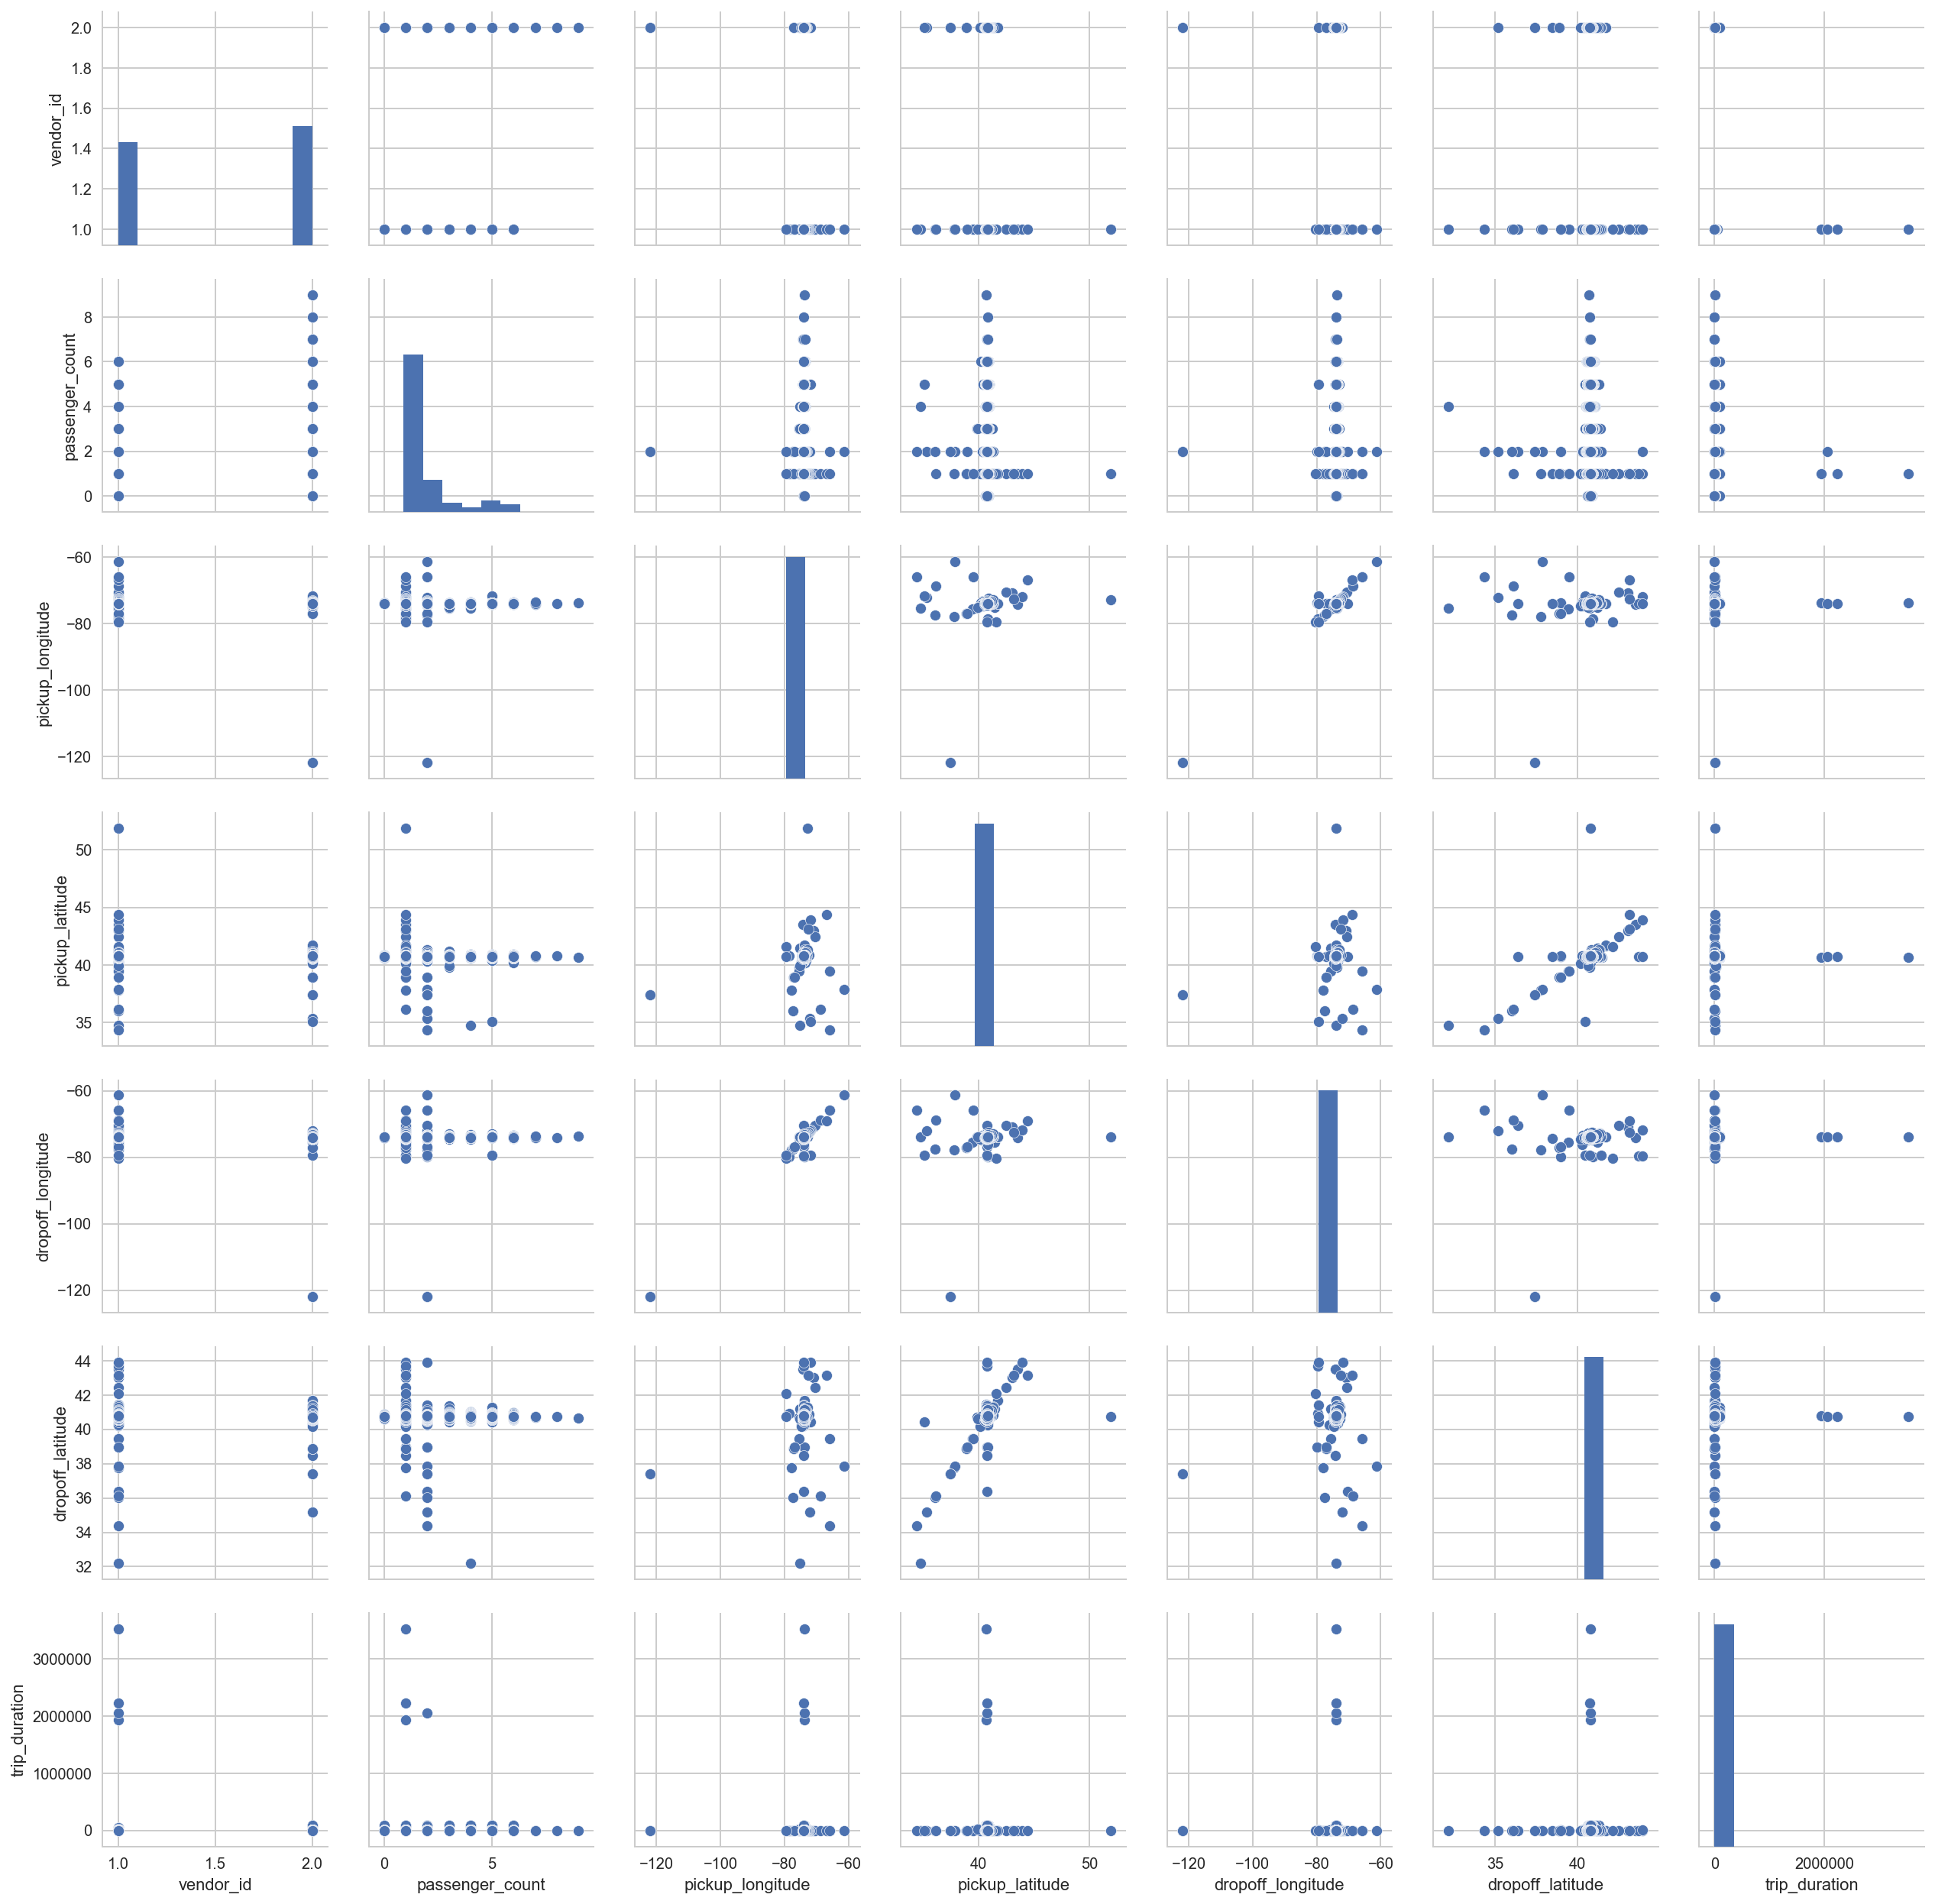

In [42]:
sns.pairplot(taxi)
plt.show()